# Explore Data

Author: James Smith

In [44]:
import pandas as pd
import numpy as np
import json
import nltk
import re
import csv
import matplotlib.pyplot as plt 
import seaborn as sns
#from tqdm import tqdm
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

%matplotlib inline
pd.set_option('display.max_colwidth', 300)

In [45]:
dataset_loc = r"C:\Users\User\Documents\ITB Year 2\Text Analytics and Web Content Mining\Assignments\Assignment 2\Data\overview_dataset.csv"

def get_main_dataset(loc_1):
    """
    IMDb ID's sometimes contain a '0' before the ID, thus 
    we must ensure we load it as a string and not a number.
    
    """
    data = pd.read_csv(loc_1, usecols = ['imdbId', 'title', 'plot_outline', 'genres'], dtype = {'imdbId': str})
    
    return data

data = get_main_dataset(dataset_loc)

In [46]:
data.head()

,imdbId,title,plot_outline,genres
0,0114709,Toy Story,"A little boy named Andy loves to be in his room, playing with his toys, especially his doll named ""Woody"". But, what do the toys do when Andy is not with them, they come to life. Woody believes that his life (as a toy) is good. However, he must worry about Andy's family moving, and what Woody do...","Animation, Adventure, Comedy, Family, Fantasy"
1,0113497,Jumanji,"After being trapped in a jungle board game for 26 years, a Man-Child wins his release from the game. But, no sooner has he arrived that he is forced to play again, and this time sets the creatures of the jungle loose on the city. Now it is up to him to stop them.","Adventure, Comedy, Family, Fantasy"
2,0113228,Grumpier Old Men,"Things don't seem to change much in Wabasha County: Max and John are still fighting after 35 years, Grandpa still drinks, smokes, and chases women , and nobody's been able to catch the fabled ""Catfish Hunter"", a gigantic catfish that actually smiles at fishermen who try to snare it. Six months a...","Comedy, Romance"
3,0114885,Waiting to Exhale,"This story based on the best selling novel by Terry McMillan follows the lives of four African-American women as they try to deal with their very lives. Friendship becomes the strongest bond between these women as men, careers, and families take them in different directions. Often light-hearted ...","Comedy, Drama, Romance"
4,0113041,Father of the Bride Part II,"In this sequel to ""Father of the Bride"", George Banks must accept the reality of what his daughter's ascension from daughter to wife, and now, to mother means when placed into perspective against his own stage of life. As the comfortable family unit starts to unravel in his mind, a rapid progres...","Comedy, Family, Romance"


In [47]:
data.dtypes

imdbId          object
title           object
plot_outline    object
genres          object
dtype: object

Checking is there are any missing empty strings

In [48]:
num_blank_title = len(data[data['title'] == ''])
num_blank_plot_outline = len(data[data['plot_outline'] == ''])
num_blank_genres = len(data[data['genres'] == ''])

print("Number of rows with missing title:", num_blank_title)
print("Number of rows with missing plot_outline:", num_blank_plot_outline)
print("Number of rows with missing genres:", num_blank_genres)

Number of rows with missing title: 0
Number of rows with missing plot_outline: 0
Number of rows with missing genres: 0


In [49]:
string = data['genres'][0]
string

'Animation, Adventure, Comedy, Family, Fantasy'

In [55]:
list_string = string.replace(',', '').split(" ")
list_string

['Animation', 'Adventure', 'Comedy', 'Family', 'Fantasy']

In [63]:
genres_list = []

for i in data.index:
    '''
    Convert the single string of genres into lists and add as
    a new column
    '''
    genre_string = str(data['genres'][i])
    genre_list = genre_string.replace(',', '').split(" ")
    genres_list.append(genre_list)

data['genre_list'] = genres_list

data_test.head()

,imdbId,title,plot_outline,genres,genre_list
0,0114709,Toy Story,"A little boy named Andy loves to be in his room, playing with his toys, especially his doll named ""Woody"". But, what do the toys do when Andy is not with them, they come to life. Woody believes that his life (as a toy) is good. However, he must worry about Andy's family moving, and what Woody do...","Animation, Adventure, Comedy, Family, Fantasy","[Animation, Adventure, Comedy, Family, Fantasy]"
1,0113497,Jumanji,"After being trapped in a jungle board game for 26 years, a Man-Child wins his release from the game. But, no sooner has he arrived that he is forced to play again, and this time sets the creatures of the jungle loose on the city. Now it is up to him to stop them.","Adventure, Comedy, Family, Fantasy","[Adventure, Comedy, Family, Fantasy]"
2,0113228,Grumpier Old Men,"Things don't seem to change much in Wabasha County: Max and John are still fighting after 35 years, Grandpa still drinks, smokes, and chases women , and nobody's been able to catch the fabled ""Catfish Hunter"", a gigantic catfish that actually smiles at fishermen who try to snare it. Six months a...","Comedy, Romance","[Comedy, Romance]"
3,0114885,Waiting to Exhale,"This story based on the best selling novel by Terry McMillan follows the lives of four African-American women as they try to deal with their very lives. Friendship becomes the strongest bond between these women as men, careers, and families take them in different directions. Often light-hearted ...","Comedy, Drama, Romance","[Comedy, Drama, Romance]"
4,0113041,Father of the Bride Part II,"In this sequel to ""Father of the Bride"", George Banks must accept the reality of what his daughter's ascension from daughter to wife, and now, to mother means when placed into perspective against his own stage of life. As the comfortable family unit starts to unravel in his mind, a rapid progres...","Comedy, Family, Romance","[Comedy, Family, Romance]"


## Investigate Genres

In [65]:
total_genres = sum(genres_list, [])
len(set(total_genres))

28

`nltk` has a library `FreqDist()` that creates a dictionary of genres and their occurance count across the dataset [sourced from here](https://www.analyticsvidhya.com/blog/2019/04/predicting-movie-genres-nlp-multi-label-classification/)

In [66]:
all_genres = nltk.FreqDist(total_genres) 

# create dataframe
all_genres_df = pd.DataFrame({'Genre': list(all_genres.keys()), 
                              'Count': list(all_genres.values())})

Visualise most common genres - **DO A WORD CLOUD**

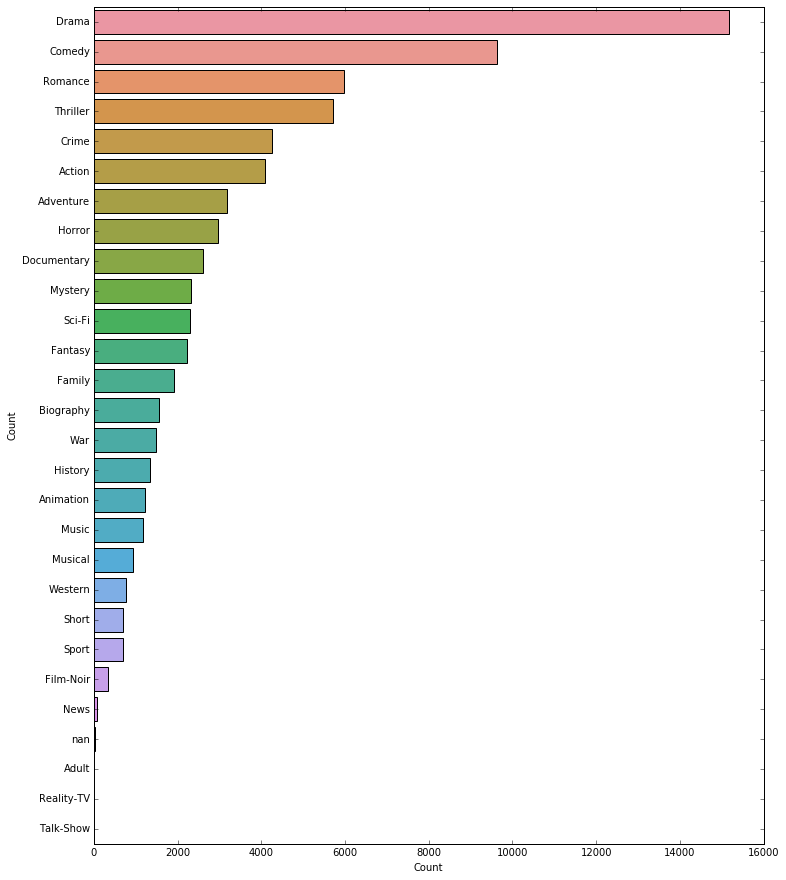

In [67]:
g = all_genres_df.nlargest(columns="Count", n = 50) 
plt.figure(figsize=(12,15)) 
ax = sns.barplot(data=g, x= "Count", y = "Genre") 
ax.set(ylabel = 'Count') 
plt.show()

Clean data a little bit - **DO MORE OF LATER**

In the clean_plot column, all the text is in lowercase and there are also no punctuation marks. Our text cleaning has worked like a charm.

In [70]:
# function for text cleaning 
def clean_text(text):
    # Convert to string
    text = str(text)
    # remove backslash-apostrophe 
    text = re.sub("\'", "", text) 
    # remove everything except alphabets 
    text = re.sub("[^a-zA-Z]"," ",text) 
    # remove whitespaces 
    text = ' '.join(text.split()) 
    # convert text to lowercase 
    text = text.lower() 
    
    return text

In [71]:
data['clean_plot_outline'] = data['plot_outline'].apply(lambda x: clean_text(x))
data.head()

,imdbId,title,plot_outline,genres,genre_list,clean_plot_outline
0,0114709,Toy Story,"A little boy named Andy loves to be in his room, playing with his toys, especially his doll named ""Woody"". But, what do the toys do when Andy is not with them, they come to life. Woody believes that his life (as a toy) is good. However, he must worry about Andy's family moving, and what Woody do...","Animation, Adventure, Comedy, Family, Fantasy","[Animation, Adventure, Comedy, Family, Fantasy]",a little boy named andy loves to be in his room playing with his toys especially his doll named woody but what do the toys do when andy is not with them they come to life woody believes that his life as a toy is good however he must worry about andys family moving and what woody does not know is...
1,0113497,Jumanji,"After being trapped in a jungle board game for 26 years, a Man-Child wins his release from the game. But, no sooner has he arrived that he is forced to play again, and this time sets the creatures of the jungle loose on the city. Now it is up to him to stop them.","Adventure, Comedy, Family, Fantasy","[Adventure, Comedy, Family, Fantasy]",after being trapped in a jungle board game for years a man child wins his release from the game but no sooner has he arrived that he is forced to play again and this time sets the creatures of the jungle loose on the city now it is up to him to stop them
2,0113228,Grumpier Old Men,"Things don't seem to change much in Wabasha County: Max and John are still fighting after 35 years, Grandpa still drinks, smokes, and chases women , and nobody's been able to catch the fabled ""Catfish Hunter"", a gigantic catfish that actually smiles at fishermen who try to snare it. Six months a...","Comedy, Romance","[Comedy, Romance]",things dont seem to change much in wabasha county max and john are still fighting after years grandpa still drinks smokes and chases women and nobodys been able to catch the fabled catfish hunter a gigantic catfish that actually smiles at fishermen who try to snare it six months ago john married...
3,0114885,Waiting to Exhale,"This story based on the best selling novel by Terry McMillan follows the lives of four African-American women as they try to deal with their very lives. Friendship becomes the strongest bond between these women as men, careers, and families take them in different directions. Often light-hearted ...","Comedy, Drama, Romance","[Comedy, Drama, Romance]",this story based on the best selling novel by terry mcmillan follows the lives of four african american women as they try to deal with their very lives friendship becomes the strongest bond between these women as men careers and families take them in different directions often light hearted this...
4,0113041,Father of the Bride Part II,"In this sequel to ""Father of the Bride"", George Banks must accept the reality of what his daughter's ascension from daughter to wife, and now, to mother means when placed into perspective against his own stage of life. As the comfortable family unit starts to unravel in his mind, a rapid progres...","Comedy, Family, Romance","[Comedy, Family, Romance]",in this sequel to father of the bride george banks must accept the reality of what his daughters ascension from daughter to wife and now to mother means when placed into perspective against his own stage of life as the comfortable family unit starts to unravel in his mind a rapid progression int...


>The function below will visualize the words and their frequency in a set of documents. Let’s use it to find out the most frequent words in the movie plots column:

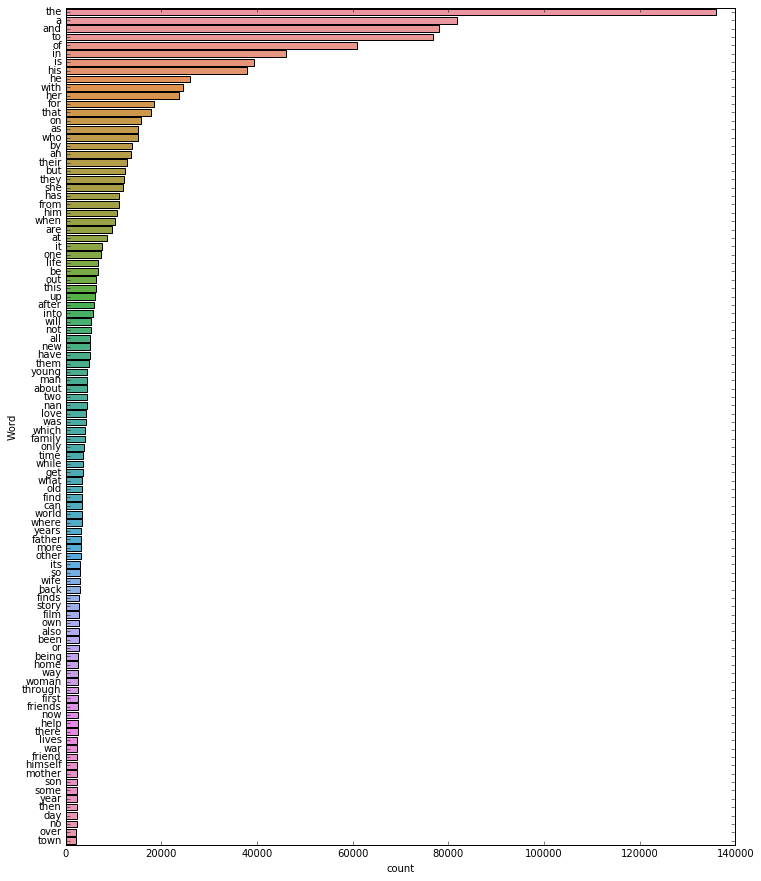

In [72]:
def freq_words(x, terms = 30): 
  all_words = ' '.join([text for text in x]) 
  all_words = all_words.split() 
  fdist = nltk.FreqDist(all_words) 
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())}) 
  
  # selecting top 20 most frequent words 
  d = words_df.nlargest(columns="count", n = terms) 
  
  # visualize words and frequencies
  plt.figure(figsize=(12,15)) 
  ax = sns.barplot(data=d, x= "count", y = "word") 
  ax.set(ylabel = 'Word') 
  plt.show()
  
# print 100 most frequent words 
freq_words(data['clean_plot_outline'], 100)

Most of the terms in the above plot are stopwords. These stopwords carry far less meaning than other keywords in the text (they just add noise to the data). I’m going to go ahead and remove them from the plots’ text. You can download the list of stopwords from the nltk library:

In [74]:
#nltk.download('stopwords')

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

# function to remove stopwords
def remove_stopwords(text):
    no_stopword_text = [w for w in text.split() if not w in stop_words]
    return ' '.join(no_stopword_text)

data['clean_plot_outline'] = data['clean_plot_outline'].apply(lambda x: remove_stopwords(x))

Check the most frequent terms sans the stopwords:

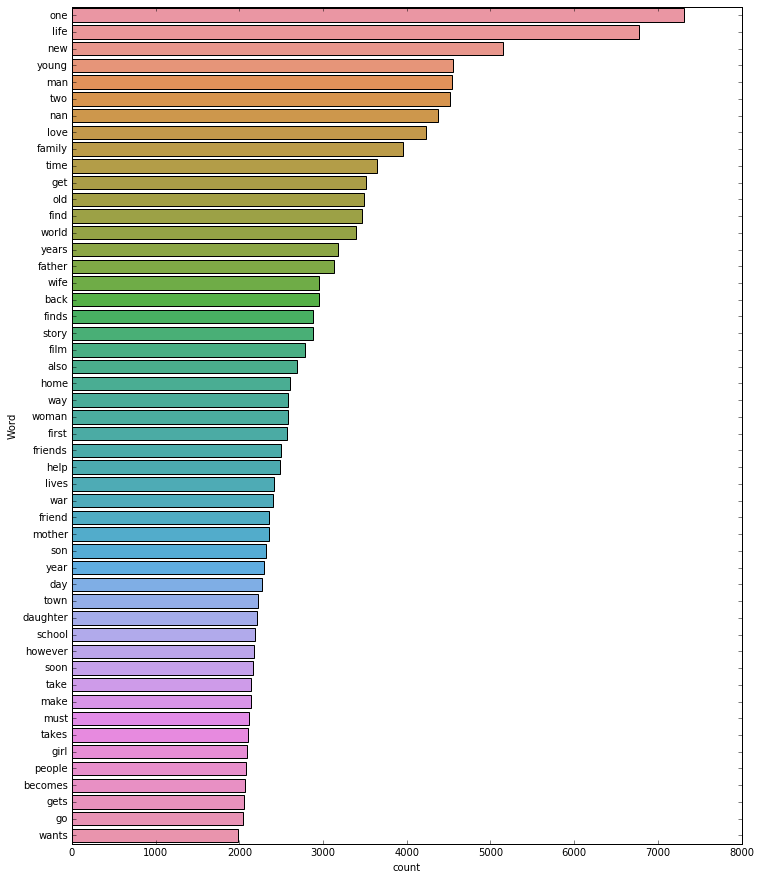

In [75]:
freq_words(data['clean_plot_outline'], 50)

## Converting Text to Features

> I mentioned earlier that we will treat this multi-label classification problem as a Binary Relevance problem. Hence, we will now one hot encode the target variable, i.e., genre_new by using sklearn’s MultiLabelBinarizer( )

In [78]:
from sklearn.preprocessing import MultiLabelBinarizer

multilabel_binarizer = MultiLabelBinarizer()
multilabel_binarizer.fit(data['genre_list'])

# transform target variable
y = multilabel_binarizer.transform(data['genre_list'])

28251

### Extracting Features from Text - Enhance!

An Intuitive Understanding of Word Embeddings: From Count Vectors to Word2Vec

A Step-by-Step NLP Guide to Learn ELMo for Extracting Features from Text

In [79]:
tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=10000)

Now, before creating TF-IDF features, we will split our data into train and validation sets for training and evaluating our model’s performance. I’m going with a 80-20 split – 80% of the data samples in the train set and the rest in the validation set:

In [82]:
# split dataset into training and validation set
xtrain, xval, ytrain, yval = train_test_split(data['clean_plot_outline'], y, test_size=0.2, random_state=9)

In [83]:
# create TF-IDF features
xtrain_tfidf = tfidf_vectorizer.fit_transform(xtrain)
xval_tfidf = tfidf_vectorizer.transform(xval)

# Build First Model

In [84]:
from sklearn.linear_model import LogisticRegression

# Binary Relevance
from sklearn.multiclass import OneVsRestClassifier

# Performance metric
from sklearn.metrics import f1_score

In [85]:
lr = LogisticRegression()
clf = OneVsRestClassifier(lr)

In [86]:
# fit model on train data
clf.fit(xtrain_tfidf, ytrain)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
          n_jobs=1)

In [87]:
# make predictions for validation set
y_pred = clf.predict(xval_tfidf)

In [88]:
y_pred[3]

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

It is a binary one-dimensional array of length x. Basically, it is the one-hot encoded form of the unique genre tags. We will have to find a way to convert it into movie genre tags.

Luckily, sk-learn comes to our rescue once again. We will use the inverse_transform( ) function along with the MultiLabelBinarizer( ) object to convert the predicted arrays into movie genre tags:

In [89]:
multilabel_binarizer.inverse_transform(y_pred)[3]

('Drama',)

However, to evaluate our model’s overall performance, we need to take into consideration all the predictions and the entire target variable of the validation set:

In [90]:
# evaluate performance
f1_score(yval, y_pred, average="micro")

0.4564019756838906

These predictions were made based on a threshold value of 0.5, which means that the probabilities greater than or equal to 0.5 were converted to 1’s and the rest to 0’s.

Let’s try to change this threshold value and see if that improves our model’s score:

In [92]:
# predict probabilities
y_pred_prob = clf.predict_proba(xval_tfidf)

t = 0.3 # threshold value
y_pred_new = (y_pred_prob >= t).astype(int)

# evaluate performance
f1_score(yval, y_pred_new, average="micro")

0.5819391042294502

## Create Inference Function

Wait – we are not done with the problem yet. We also have to take care of the new data or new movie plots that will come in the future, right? Our movie genre prediction system should be able to take a movie plot in raw form as input and generate its genre tag(s).

To achieve this, let’s build an inference function. It will take a movie plot text and follow the below steps:

- Clean the text
- Remove stopwords from the cleaned text
- Extract features from the text
- Make predictions
- Return the predicted movie genre tags

In [93]:
def infer_tags(q):
    q = clean_text(q)
    q = remove_stopwords(q)
    q_vec = tfidf_vectorizer.transform([q])
    q_pred = clf.predict(q_vec)
    return multilabel_binarizer.inverse_transform(q_pred)

In [95]:
for i in range(5): 
  k = xval.sample(1).index[0] 
  print("Movie: ", data['title'][k], "\nPredicted genre: ", infer_tags(xval[k])), print("Actual genre: ",data['genre_list'][k], "\n")

Movie:  The Sword and the Rose 
Predicted genre:  [('Drama', 'History', 'Romance')]
Actual genre:  ['Adventure', 'Drama', 'Family', 'History'] 

Movie:  Sibling Rivalry 
Predicted genre:  [('Comedy', 'Drama')]
Actual genre:  ['Comedy'] 

Movie:  Dick Tracy vs. Cueball 
Predicted genre:  [('Comedy', 'Crime')]
Actual genre:  ['Action', 'Crime', 'Mystery'] 

Movie:  A Feast at Midnight 
Predicted genre:  [()]
Actual genre:  ['Comedy', 'Drama', 'Family'] 

Movie:  Tyson 
Predicted genre:  [('Drama',)]
Actual genre:  ['Documentary', 'Biography', 'Sport'] 

